In [ ]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import numpy as np
from scipy import stats

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
import pandas as pd

train = pd.read_csv("data/train_df_jm.csv")
test = pd.read_csv("data/test_df_jm.csv")
sub = pd.read_csv("data/sample_submission.csv")
age = pd.read_csv("data/age_gender_info.csv")
# make_age = pd.read_csv("make_age_data.csv") ## 따로 만든 age 데이터 가지고 와서 넣기
train.shape, test.shape, sub.shape, age.shape

In [ ]:
train.columns

In [ ]:
train.head(30)

In [ ]:
train.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '등록차량수']

test.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수']

## Age 정보 추가

In [ ]:
train.shape, test.shape

In [ ]:
train = pd.merge(train,age, left_on='지역', right_on='지역' ,how='outer')
test = pd.merge(train,age, left_on='지역', right_on='지역' ,how='outer')

In [ ]:
train.shape, test.shape

In [ ]:

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(train['등록차량수'])
ax[0][1].hist(np.log(train['등록차량수']))

stats.probplot(train['등록차량수'], plot=ax[1][0])
stats.probplot(np.log(train['등록차량수']), plot=ax[1][1])

In [9]:
all_df = pd.concat([train, test], join='inner', ignore_index=True) #기존 인덱스 겹쳐지지 않게 만들어준다
all_df
all_df.shape

(3877, 14)

(3877, 14)

In [10]:
all_df.shape

(3877, 14)

(3877, 14)

In [11]:
# train['단지코드'].unique()
# np.unique(train['단지코드'], return_counts = True)

In [12]:
# all_df['단지코드'].unique()
# np.unique(all_df['단지코드'], return_counts = True)

In [13]:
all_df.head(100).sort_values('단지코드')


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
49,C1171,624,아파트,대전광역시,국민임대,39.46,43,13.0,A,23641000,141840,0.0,5.0,634.0
52,C1171,624,아파트,대전광역시,국민임대,46.66,15,13.0,A,35462000,189130,0.0,5.0,634.0
48,C1171,624,아파트,대전광역시,국민임대,39.46,106,13.0,A,23641000,141840,0.0,5.0,634.0
47,C1171,624,아파트,대전광역시,국민임대,33.38,190,13.0,A,17730000,118190,0.0,5.0,634.0
53,C1171,624,아파트,대전광역시,국민임대,46.87,46,13.0,A,35462000,189130,0.0,5.0,634.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0
84,C2576,405,아파트,경상남도,국민임대,46.90,313,19.0,A,19436000,161780,0.0,4.0,296.0


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
49,C1171,624,아파트,대전광역시,국민임대,39.46,43,13.0,A,23641000,141840,0.0,5.0,634.0
52,C1171,624,아파트,대전광역시,국민임대,46.66,15,13.0,A,35462000,189130,0.0,5.0,634.0
48,C1171,624,아파트,대전광역시,국민임대,39.46,106,13.0,A,23641000,141840,0.0,5.0,634.0
47,C1171,624,아파트,대전광역시,국민임대,33.38,190,13.0,A,17730000,118190,0.0,5.0,634.0
53,C1171,624,아파트,대전광역시,국민임대,46.87,46,13.0,A,35462000,189130,0.0,5.0,634.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0
84,C2576,405,아파트,경상남도,국민임대,46.90,313,19.0,A,19436000,161780,0.0,4.0,296.0


## 결측치 처리

### 자격유형

In [14]:
all_df.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            2
임대보증금         749
임대료           749
10분내지하철수      245
10분내버스정류장수      0
단지내주차면수         0
dtype: int64

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            2
임대보증금         749
임대료           749
10분내지하철수      245
10분내버스정류장수      0
단지내주차면수         0
dtype: int64

In [15]:
all_df.loc[all_df['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
3065,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0
3127,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
3065,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0
3127,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0


In [16]:
grouped = all_df.groupby(['단지코드', '임대건물구분', '지역','공급유형'])
group1 = grouped.get_group( ('C2411', '아파트', '경상남도', '국민임대')  )
group1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
3062,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000,100720,0.0,2.0,840.0
3063,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000,100720,0.0,2.0,840.0
3064,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000,100720,0.0,2.0,840.0
3065,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0
3066,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000,171480,0.0,2.0,840.0


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
3062,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000,100720,0.0,2.0,840.0
3063,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000,100720,0.0,2.0,840.0
3064,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000,100720,0.0,2.0,840.0
3065,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0
3066,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000,171480,0.0,2.0,840.0


In [17]:
group2 = grouped.get_group( ('C2253', '아파트', '강원도', '영구임대')  )
group2

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
3127,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0
3128,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3731000,83020,0.0,2.0,173.0
3129,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3731000,83020,0.0,2.0,173.0


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
3127,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0
3128,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3731000,83020,0.0,2.0,173.0
3129,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3731000,83020,0.0,2.0,173.0


In [18]:
all_df.loc[ 3065, "자격유형"] = 'A'
all_df.loc[ 3127, "자격유형"] = 'C'

In [19]:
all_df.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금         749
임대료           749
10분내지하철수      245
10분내버스정류장수      0
단지내주차면수         0
dtype: int64

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금         749
임대료           749
10분내지하철수      245
10분내버스정류장수      0
단지내주차면수         0
dtype: int64

### 임대보증금

In [20]:
print(all_df[all_df['임대보증금']=='-'].shape)
# - 값 0으로 바꾸기
all_df.loc[all_df['임대보증금']=='-','임대보증금'] = 0
print('변경후')
print(all_df[all_df['임대보증금']=='-'].shape)

(18, 14)
변경후
(0, 14)
(18, 14)
변경후
(0, 14)


In [21]:
#일단 Nan 0으로 처리
print(all_df['임대보증금'].isnull().sum())
all_df['임대보증금'] = all_df['임대보증금'].fillna(0)
print('변경후')
print(all_df['임대보증금'].isnull().sum())

749
변경후
0
749
변경후
0


### 임대료

In [22]:
print(all_df[all_df['임대료']=='-'].shape)
# - 값 0으로 바꾸기
all_df.loc[all_df['임대료']=='-','임대료'] = 0
print('변경후')
print(all_df[all_df['임대료']=='-'].shape)

(21, 14)
변경후
(0, 14)
(21, 14)
변경후
(0, 14)


In [23]:
#일단 Nan 0으로 처리
print(all_df['임대료'].isnull().sum())
all_df['임대료'] = all_df['임대료'].fillna(0)
print('변경후')
print(all_df['임대료'].isnull().sum())

749
변경후
0
749
변경후
0


In [24]:
all_df['임대료'] = all_df['임대료'].astype(int)
all_df['임대보증금'] = all_df['임대보증금'].astype(int)

In [25]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   단지코드        3877 non-null   object 
 1   총세대수        3877 non-null   int64  
 2   임대건물구분      3877 non-null   object 
 3   지역          3877 non-null   object 
 4   공급유형        3877 non-null   object 
 5   전용면적        3877 non-null   float64
 6   전용면적별세대수    3877 non-null   int64  
 7   공가수         3877 non-null   float64
 8   자격유형        3877 non-null   object 
 9   임대보증금       3877 non-null   int32  
 10  임대료         3877 non-null   int32  
 11  10분내지하철수    3632 non-null   float64
 12  10분내버스정류장수  3877 non-null   float64
 13  단지내주차면수     3877 non-null   float64
dtypes: float64(5), int32(2), int64(2), object(5)
memory usage: 393.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------    

### 10분내 지하철 수

In [26]:
#일단 Nan 0으로 처리
# print(all_df['10분내지하철수'].isnull().sum())
# all_df['10분내지하철수'] = all_df['10분내지하철수'].fillna(0)
# print('변경후')
# print(all_df['10분내지하철수'].isnull().sum())

In [27]:
sub_tn = pd.read_csv("data/train(subway).csv")
sub_tt = pd.read_csv("data/test(subway).csv")

In [28]:
all_sub_df = pd.concat([sub_tn['지하철수'], sub_tt['지하철수']], join='inner', ignore_index=True) #기존 인덱스 겹쳐지지 않게 만들어준다
all_sub_df.shape

(3877,)

(3877,)

In [29]:
all_df['10분내지하철수'] = all_sub_df

In [30]:
all_df.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0


In [31]:
all_df.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금         0
임대료           0
10분내지하철수      0
10분내버스정류장수    0
단지내주차면수       0
dtype: int64

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금         0
임대료           0
10분내지하철수      0
10분내버스정류장수    0
단지내주차면수       0
dtype: int64

In [32]:
all_df.corr()['10분내버스정류장수']

총세대수         -0.001356
전용면적          0.002800
전용면적별세대수      0.040957
공가수           0.038177
임대보증금         0.124743
임대료           0.084311
10분내지하철수      0.087586
10분내버스정류장수    1.000000
단지내주차면수       0.102414
Name: 10분내버스정류장수, dtype: float64

총세대수         -0.001356
전용면적          0.002800
전용면적별세대수      0.040957
공가수           0.038177
임대보증금         0.124743
임대료           0.084311
10분내지하철수      0.087586
10분내버스정류장수    1.000000
단지내주차면수       0.102414
Name: 10분내버스정류장수, dtype: float64

In [33]:
grouped = train.groupby(['임대건물구분', '지역'])
group1 = grouped.get_group( ('아파트', '경상남도')  )
group1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2772,C2225,1206,아파트,경상남도,행복주택,26.17,120,49.0,K,51961000,27060,0.0,3.0,842.0,448.0
2773,C2225,1206,아파트,경상남도,행복주택,26.19,16,49.0,K,51961000,27060,0.0,3.0,842.0,448.0
2774,C2225,1206,아파트,경상남도,행복주택,36.03,290,49.0,K,72294000,37650,0.0,3.0,842.0,448.0
2775,C2225,1206,아파트,경상남도,행복주택,36.03,60,49.0,K,72294000,37650,0.0,3.0,842.0,448.0


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2772,C2225,1206,아파트,경상남도,행복주택,26.17,120,49.0,K,51961000,27060,0.0,3.0,842.0,448.0
2773,C2225,1206,아파트,경상남도,행복주택,26.19,16,49.0,K,51961000,27060,0.0,3.0,842.0,448.0
2774,C2225,1206,아파트,경상남도,행복주택,36.03,290,49.0,K,72294000,37650,0.0,3.0,842.0,448.0
2775,C2225,1206,아파트,경상남도,행복주택,36.03,60,49.0,K,72294000,37650,0.0,3.0,842.0,448.0


In [34]:
grouped = train.groupby(['임대건물구분', '지역'])
group1 = grouped.get_group( ('아파트', '경상남도')  )
val = group1['10분내버스정류장수'].mean()
val

4.011278195488722

4.011278195488722

In [35]:
# 데이터 확인 후, 처리
all_df.loc[ all_df['10분내버스정류장수'].isnull(), "10분내버스정류장수"] = val

In [36]:
all_df.loc[ all_df['10분내버스정류장수'].isnull(), :]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수


In [37]:
all_df.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금         0
임대료           0
10분내지하철수      0
10분내버스정류장수    0
단지내주차면수       0
dtype: int64

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금         0
임대료           0
10분내지하철수      0
10분내버스정류장수    0
단지내주차면수       0
dtype: int64

In [38]:
all_df.shape

(3877, 14)

(3877, 14)

In [39]:
# all_df.to_csv('age추가전.csv', index=False, encoding='euc-kr')
# all_df.head()

In [40]:
# all_df.to_csv('age추가후.csv', index=False, encoding='euc-kr')
# all_df.head()

# 라벨인코딩

In [41]:
mapping = { 'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 
            'F':6, 'G':7, 'H':8, 'I':9, 'J':10, 
            'K':11, 'L':12, 'M':13, 'N':14, 'O':15  }

all_df['자격유형'] =all_df['자격유형'].map(mapping).astype(int)

In [42]:
all_df.head(100)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000,82940,0.0,3.0,624.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000,107130,0.0,3.0,624.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000,107130,0.0,3.0,624.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,1,18433000,149760,0.0,3.0,624.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,1,18433000,149760,0.0,3.0,624.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,C1874,619,상가,충청남도,임대상가,17.40,1,2.0,4,0,0,0.0,2.0,97.0
96,C1874,619,상가,충청남도,임대상가,22.89,1,2.0,4,0,0,0.0,2.0,97.0
97,C1874,619,상가,충청남도,임대상가,23.13,1,2.0,4,0,0,0.0,2.0,97.0
98,C1874,619,상가,충청남도,임대상가,23.13,1,2.0,4,0,0,0.0,2.0,97.0


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000,82940,0.0,3.0,624.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000,107130,0.0,3.0,624.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000,107130,0.0,3.0,624.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,1,18433000,149760,0.0,3.0,624.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,1,18433000,149760,0.0,3.0,624.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,C1874,619,상가,충청남도,임대상가,17.40,1,2.0,4,0,0,0.0,2.0,97.0
96,C1874,619,상가,충청남도,임대상가,22.89,1,2.0,4,0,0,0.0,2.0,97.0
97,C1874,619,상가,충청남도,임대상가,23.13,1,2.0,4,0,0,0.0,2.0,97.0
98,C1874,619,상가,충청남도,임대상가,23.13,1,2.0,4,0,0,0.0,2.0,97.0


In [43]:
gubun1 = {'아파트':1, '상가':2}
gubun2 = {'경상남도':1, '대전광역시':2, '경기도':3, '전라북도':4, 
          '강원도':5, '광주광역시':6, '충청남도':7, '부산광역시':8, 
          '제주특별자치도':9, '울산광역시':10, '충청북도':11, '전라남도':12, 
          '경상북도':13, '대구광역시':14, '서울특별시':15, '세종특별자치시':16}

gubun3 = {'국민임대':1, '공공임대(50년)':2, '영구임대':3, '임대상가':4, 
          '공공임대(10년)':5, '공공임대(분납)':6, '장기전세':7, '공공분양':8, 
          '행복주택':9, '공공임대(5년)':10}

all_df['임대건물구분_lbl'] = all_df['임대건물구분'].map(gubun1)
all_df['지역_lbl'] = all_df['지역'].map(gubun2)
all_df['공급유형_lbl'] = all_df['공급유형'].map(gubun3)

all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,임대건물구분_lbl,지역_lbl,공급유형_lbl
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000,82940,0.0,3.0,624.0,1,1,1
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000,107130,0.0,3.0,624.0,1,1,1
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000,107130,0.0,3.0,624.0,1,1,1
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,1,18433000,149760,0.0,3.0,624.0,1,1,1
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,1,18433000,149760,0.0,3.0,624.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,12,0,0,0.0,1.0,467.0,1,1,9
3873,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,8,6872000,106400,0.0,2.0,300.0,1,4,1
3874,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,8,6872000,106400,2.0,2.0,300.0,1,4,1
3875,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,8,13410000,144600,2.0,2.0,300.0,1,4,1


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,임대건물구분_lbl,지역_lbl,공급유형_lbl
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000,82940,0.0,3.0,624.0,1,1,1
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000,107130,0.0,3.0,624.0,1,1,1
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000,107130,0.0,3.0,624.0,1,1,1
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,1,18433000,149760,0.0,3.0,624.0,1,1,1
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,1,18433000,149760,0.0,3.0,624.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,12,0,0,0.0,1.0,467.0,1,1,9
3873,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,8,6872000,106400,0.0,2.0,300.0,1,4,1
3874,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,8,6872000,106400,2.0,2.0,300.0,1,4,1
3875,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,8,13410000,144600,2.0,2.0,300.0,1,4,1


In [44]:
all_df['단지코드'] = all_df['단지코드'].astype("category")
all_df['단지코드_lbl'] = all_df['단지코드'].cat.codes # category가 code로 변환된다.

### 전용면적을 구간화하기
all_df['전용면적별세대수'] = all_df['전용면적별세대수'].astype('float32')

# 전용면적, 공가수, 단지내주차면수
all_df['qcut_총세대수'] = pd.qcut(all_df['총세대수'], 5, labels=False) # 구간을 나눠서 보겠다. (총 세대수에 대해서 구간 분할 해 주기)
all_df.head(10)
all_df['qcut_총세대수'].unique()

array([1, 3, 2, 4, 0], dtype=int64)

array([1, 3, 2, 4, 0], dtype=int64)

# 전용면적별 세대의 합계와 총세대수가 일치하지 않는 오류
* 차이가 14세대 이하인 48개 단지 - ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 'C1584', 'C2298', 'C2225', 'C1218', 'C1970', C1732', 'C2433', 'C1894', 'C1156', 'C2142', 'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189']
* 차이가 94~452세대인 10개 단지(크기순) - ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804’]

#### 차이가 14세대 이하인 48개 단지 : 단지코드_Type =1

In [45]:
group1 = ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', 
          'C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 
          'C1584', 'C2298', 'C2225', 'C1218', 'C1970', 'C1732', 'C2433', 'C1894', 'C1156', 'C2142', 
          'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', 
          'C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189' ]

for one1 in group1:
    all_df.loc[ all_df['단지코드'] == one1, "단지코드_Type" ] = 1

In [46]:
all_df['단지코드_Type'].unique()

array([nan,  1.])

array([nan,  1.])

#### 차이가 94~452세대인 10개단지 처리하기 :  단지코드_Type =2

In [47]:
group2 = ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804']
for one2 in group2:
        all_df.loc[all_df['단지코드'] == one2, "단지코드_Type"] = 2

#### 그외 :  단지코드_Type =3

In [48]:
all_df.loc[  all_df['단지코드_Type'].isna(), "단지코드_Type"] = 3
all_df['단지코드_Type'].unique()

array([3., 1., 2.])

array([3., 1., 2.])

### 변수 추가

In [49]:
all_df['환산보증금'] = all_df['임대보증금'].astype(int)+(all_df['임대료'].astype(int)+100)
all_df['환산보증금']

0        9299040
1       12779230
2       12779230
3       18582860
4       18582860
          ...   
3872         100
3873     6978500
3874     6978500
3875    13554700
3876    18855600
Name: 환산보증금, Length: 3877, dtype: int32

0        9299040
1       12779230
2       12779230
3       18582860
4       18582860
          ...   
3872         100
3873     6978500
3874     6978500
3875    13554700
3876    18855600
Name: 환산보증금, Length: 3877, dtype: int32

((array([-3.56959256, -3.33019321, -3.19803567, ...,  3.19803567,
          3.33019321,  3.56959256]),
  array([2.63905733, 2.63905733, 2.63905733, ..., 7.49498623, 7.49498623,
         7.49498623])),
 (0.7344105105721078, 6.126121425642588, 0.9868157045962277))

((array([-3.56959256, -3.33019321, -3.19803567, ...,  3.19803567,
          3.33019321,  3.56959256]),
  array([2.63905733, 2.63905733, 2.63905733, ..., 7.49498623, 7.49498623,
         7.49498623])),
 (0.7344105105721078, 6.126121425642588, 0.9868157045962277))

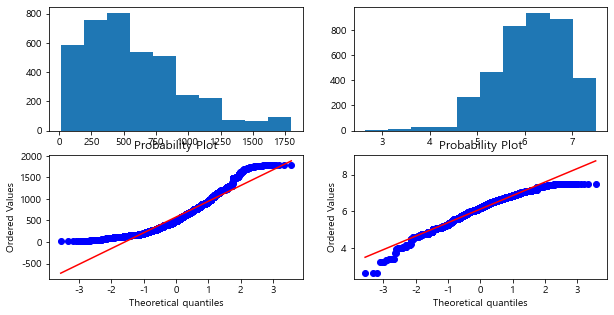

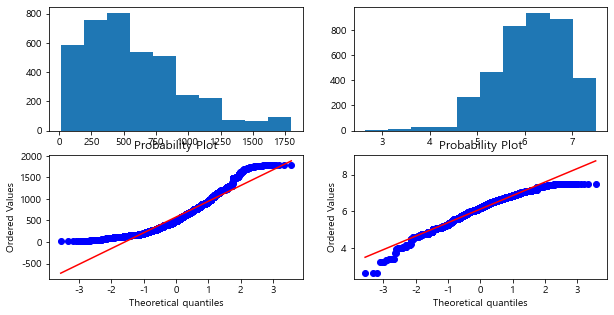

In [50]:
all_df['log_단지내주차면수'] = np.log1p(all_df['단지내주차면수'])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(all_df['단지내주차면수'])
ax[0][1].hist(all_df['log_단지내주차면수'])

stats.probplot(all_df['단지내주차면수'], plot=ax[1][0])
stats.probplot(all_df['log_단지내주차면수'], plot=ax[1][1])

((array([-3.56959256, -3.33019321, -3.19803567, ...,  3.19803567,
          3.33019321,  3.56959256]),
  array([3.29583687, 3.29583687, 3.29583687, ..., 7.85282781, 7.85282781,
         7.85282781])),
 (0.6093767949475518, 6.611311889490474, 0.9883341683848889))

((array([-3.56959256, -3.33019321, -3.19803567, ...,  3.19803567,
          3.33019321,  3.56959256]),
  array([3.29583687, 3.29583687, 3.29583687, ..., 7.85282781, 7.85282781,
         7.85282781])),
 (0.6093767949475518, 6.611311889490474, 0.9883341683848889))

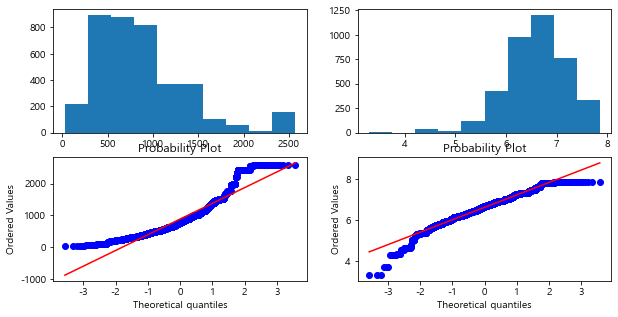

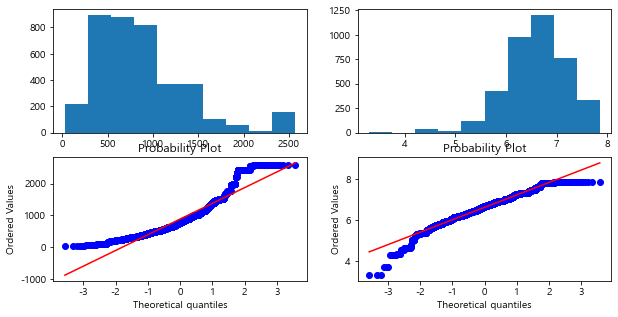

In [51]:
all_df['log_총세대수'] = np.log1p(all_df['총세대수'])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(all_df['총세대수'])
ax[0][1].hist(all_df['log_총세대수'])

stats.probplot(all_df['총세대수'], plot=ax[1][0])
stats.probplot(all_df['log_총세대수'], plot=ax[1][1])

((array([-3.56959256, -3.33019321, -3.19803567, ...,  3.19803567,
          3.33019321,  3.56959256]),
  array([0.6931472, 0.6931472, 0.6931472, ..., 7.293698 , 7.3072023,
         7.5315523], dtype=float32)),
 (1.6307518283269595, 3.662091016769409, 0.9441208816516677))

((array([-3.56959256, -3.33019321, -3.19803567, ...,  3.19803567,
          3.33019321,  3.56959256]),
  array([0.6931472, 0.6931472, 0.6931472, ..., 7.293698 , 7.3072023,
         7.5315523], dtype=float32)),
 (1.6307518283269595, 3.662091016769409, 0.9441208816516677))

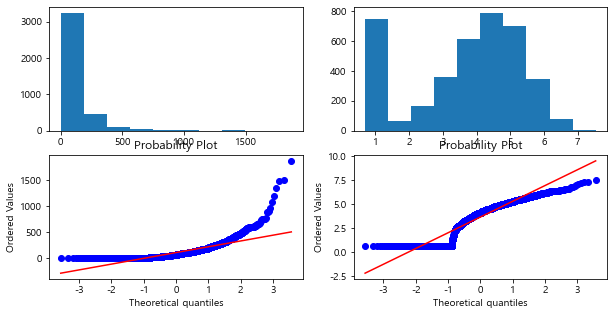

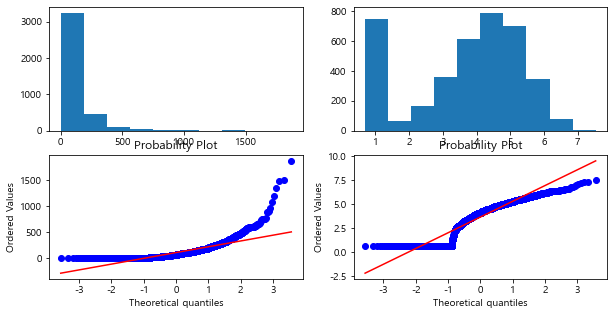

In [52]:
all_df['log_전용면적별세대수'] = np.log1p(all_df['전용면적별세대수'])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(all_df['전용면적별세대수'])
ax[0][1].hist(all_df['log_전용면적별세대수'])

stats.probplot(all_df['전용면적별세대수'], plot=ax[1][0])
stats.probplot(all_df['log_전용면적별세대수'], plot=ax[1][1])

(array([172., 260., 329., 272., 176., 579., 609., 774., 585., 121.]),
 array([0.        , 0.40253517, 0.80507034, 1.20760551, 1.61014068,
        2.01267585, 2.41521101, 2.81774618, 3.22028135, 3.62281652,
        4.02535169]),
 <BarContainer object of 10 artists>)

(array([172., 260., 329., 272., 176., 579., 609., 774., 585., 121.]),
 array([0.        , 0.40253517, 0.80507034, 1.20760551, 1.61014068,
        2.01267585, 2.41521101, 2.81774618, 3.22028135, 3.62281652,
        4.02535169]),
 <BarContainer object of 10 artists>)

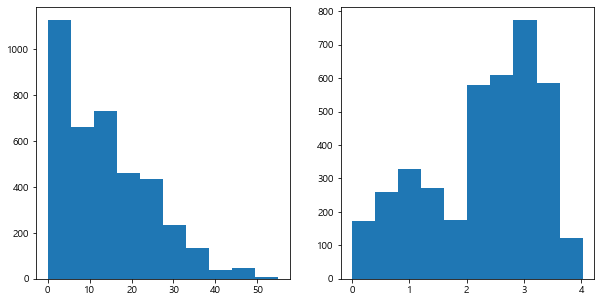

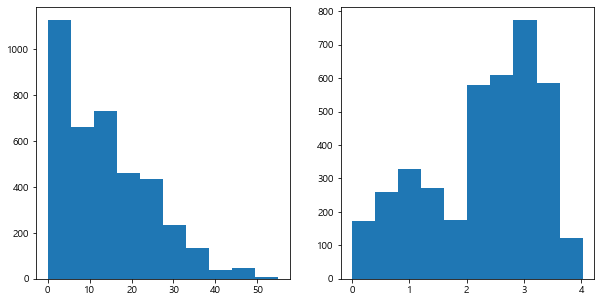

In [53]:
all_df['log_공가수'] = np.log1p(all_df['공가수'])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].hist(all_df['공가수'])
ax[1].hist(all_df['log_공가수'])

In [54]:
all_df_last = all_df.drop(['임대건물구분', '지역', '공급유형'] , axis=1)
all_df_last

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,지역_lbl,공급유형_lbl,단지코드_lbl,qcut_총세대수,단지코드_Type,환산보증금,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,1,1,492,1,3.0,9299040,6.437752,6.302619,5.624018,2.890372
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,1,1,492,1,3.0,12779230,6.437752,6.302619,4.110874,2.890372
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,1,1,492,1,3.0,12779230,6.437752,6.302619,3.044523,2.890372
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,1,1,492,1,3.0,18582860,6.437752,6.302619,3.663562,2.890372
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,1,1,492,1,3.0,18582860,6.437752,6.302619,2.995732,2.890372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,C1267,675,36.77,126.0,38.0,12,0,0,0.0,1.0,...,1,9,86,2,1.0,100,6.148468,6.516193,4.844187,3.663562
3873,C2189,382,29.19,96.0,45.0,8,6872000,106400,0.0,2.0,...,4,1,381,0,1.0,6978500,5.707110,5.948035,4.574711,3.828641
3874,C2189,382,29.19,20.0,45.0,8,6872000,106400,2.0,2.0,...,4,1,381,0,1.0,6978500,5.707110,5.948035,3.044523,3.828641
3875,C2189,382,39.45,202.0,45.0,8,13410000,144600,2.0,2.0,...,4,1,381,0,1.0,13554700,5.707110,5.948035,5.313206,3.828641


,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,지역_lbl,공급유형_lbl,단지코드_lbl,qcut_총세대수,단지코드_Type,환산보증금,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,1,1,492,1,3.0,9299040,6.437752,6.302619,5.624018,2.890372
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,1,1,492,1,3.0,12779230,6.437752,6.302619,4.110874,2.890372
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,1,1,492,1,3.0,12779230,6.437752,6.302619,3.044523,2.890372
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,1,1,492,1,3.0,18582860,6.437752,6.302619,3.663562,2.890372
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,1,1,492,1,3.0,18582860,6.437752,6.302619,2.995732,2.890372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,C1267,675,36.77,126.0,38.0,12,0,0,0.0,1.0,...,1,9,86,2,1.0,100,6.148468,6.516193,4.844187,3.663562
3873,C2189,382,29.19,96.0,45.0,8,6872000,106400,0.0,2.0,...,4,1,381,0,1.0,6978500,5.707110,5.948035,4.574711,3.828641
3874,C2189,382,29.19,20.0,45.0,8,6872000,106400,2.0,2.0,...,4,1,381,0,1.0,6978500,5.707110,5.948035,3.044523,3.828641
3875,C2189,382,39.45,202.0,45.0,8,13410000,144600,2.0,2.0,...,4,1,381,0,1.0,13554700,5.707110,5.948035,5.313206,3.828641


In [55]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   단지코드          3877 non-null   category
 1   총세대수          3877 non-null   int64   
 2   임대건물구분        3877 non-null   object  
 3   지역            3877 non-null   object  
 4   공급유형          3877 non-null   object  
 5   전용면적          3877 non-null   float64 
 6   전용면적별세대수      3877 non-null   float32 
 7   공가수           3877 non-null   float64 
 8   자격유형          3877 non-null   int32   
 9   임대보증금         3877 non-null   int32   
 10  임대료           3877 non-null   int32   
 11  10분내지하철수      3877 non-null   float64 
 12  10분내버스정류장수    3877 non-null   float64 
 13  단지내주차면수       3877 non-null   float64 
 14  임대건물구분_lbl    3877 non-null   int64   
 15  지역_lbl        3877 non-null   int64   
 16  공급유형_lbl      3877 non-null   int64   
 17  단지코드_lbl      3877 non-null   int16   
 18  qcut_총세대

In [56]:
# '총세대수' : 0.333440, '단지내주차면수' : 0.861338, 임대건물구분_lbl : -0.449130
# 전용면적    0.112717, 전용면적별세대수   0.250513, 공가수           0.118910,
# 자격유형         -0.154034, 공급유형_lbl     -0.137277

In [57]:
train.corr()['등록차량수']

총세대수          0.326923
전용면적          0.106366
전용면적별세대수      0.254948
공가수           0.130775
10분내지하철수     -0.101792
10분내버스정류장수    0.110977
단지내주차면수       0.856549
등록차량수         1.000000
Name: 등록차량수, dtype: float64

총세대수          0.326923
전용면적          0.106366
전용면적별세대수      0.254948
공가수           0.130775
10분내지하철수     -0.101792
10분내버스정류장수    0.110977
단지내주차면수       0.856549
등록차량수         1.000000
Name: 등록차량수, dtype: float64

(array([3.245e+03, 4.700e+02, 1.060e+02, 4.500e+01, 4.000e+00, 2.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 1.8740e+02, 3.7380e+02, 5.6020e+02, 7.4660e+02,
        9.3300e+02, 1.1194e+03, 1.3058e+03, 1.4922e+03, 1.6786e+03,
        1.8650e+03], dtype=float32),
 <BarContainer object of 10 artists>)

(array([3.245e+03, 4.700e+02, 1.060e+02, 4.500e+01, 4.000e+00, 2.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 1.8740e+02, 3.7380e+02, 5.6020e+02, 7.4660e+02,
        9.3300e+02, 1.1194e+03, 1.3058e+03, 1.4922e+03, 1.6786e+03,
        1.8650e+03], dtype=float32),
 <BarContainer object of 10 artists>)

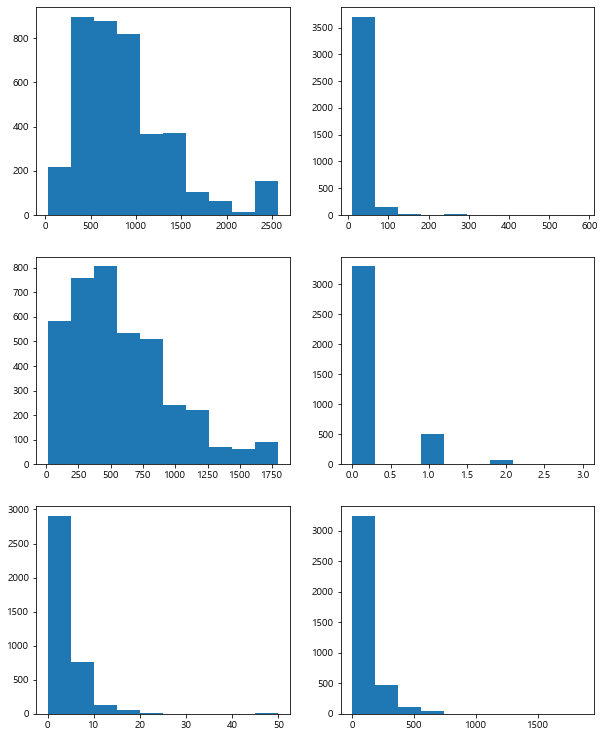

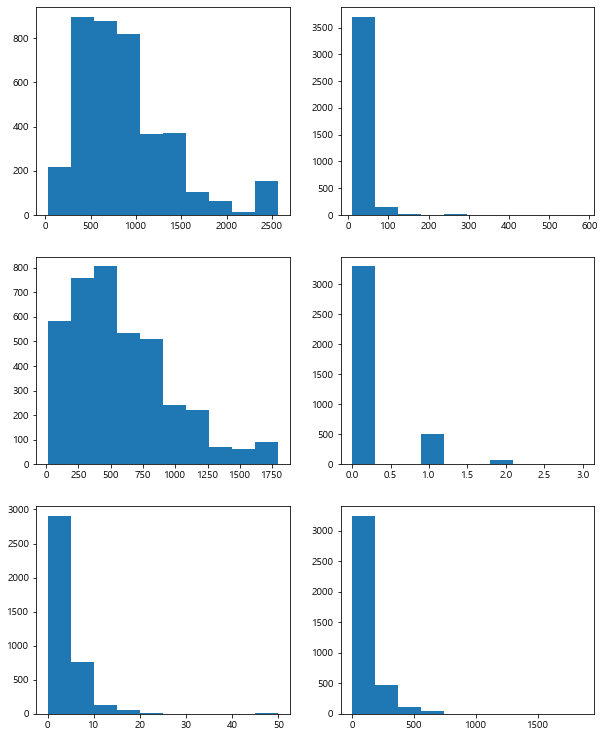

In [58]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,13))

ax[0][0].hist(all_df_last['총세대수'])
ax[0][1].hist(all_df_last['전용면적'])
ax[1][0].hist(all_df_last['단지내주차면수'])
ax[1][1].hist(all_df_last['10분내지하철수'])
ax[2][0].hist(all_df_last['10분내버스정류장수'])
ax[2][1].hist(all_df_last['전용면적별세대수'])

In [59]:
train_df = all_df_last.iloc[0:2869,:]
test_df = all_df_last.iloc[2869:,:]

train_df.shape, test_df.shape

train_df = pd.concat([train_df, train['등록차량수'] ], axis=1)
train_df

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,공급유형_lbl,단지코드_lbl,qcut_총세대수,단지코드_Type,환산보증금,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,1,492,1,3.0,9299040,6.437752,6.302619,5.624018,2.890372,205.0
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,1,492,1,3.0,12779230,6.437752,6.302619,4.110874,2.890372,205.0
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,1,492,1,3.0,12779230,6.437752,6.302619,3.044523,2.890372,205.0
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,1,492,1,3.0,18582860,6.437752,6.302619,3.663562,2.890372,205.0
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,1,492,1,3.0,18582860,6.437752,6.302619,2.995732,2.890372,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,C2532,239,49.20,19.0,7.0,1,11346000,116090,1.0,1.0,...,1,501,0,3.0,11462190,5.117994,5.480639,2.995732,2.079442,146.0
2865,C2532,239,51.08,34.0,7.0,1,14005000,142310,1.0,1.0,...,1,501,0,3.0,14147410,5.117994,5.480639,3.555348,2.079442,146.0
2866,C2532,239,51.73,34.0,7.0,1,14005000,142310,1.0,1.0,...,1,501,0,3.0,14147410,5.117994,5.480639,3.555348,2.079442,146.0
2867,C2532,239,51.96,114.0,7.0,1,14005000,142310,1.0,1.0,...,1,501,0,3.0,14147410,5.117994,5.480639,4.744932,2.079442,146.0


,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,공급유형_lbl,단지코드_lbl,qcut_총세대수,단지코드_Type,환산보증금,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,1,492,1,3.0,9299040,6.437752,6.302619,5.624018,2.890372,205.0
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,1,492,1,3.0,12779230,6.437752,6.302619,4.110874,2.890372,205.0
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,1,492,1,3.0,12779230,6.437752,6.302619,3.044523,2.890372,205.0
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,1,492,1,3.0,18582860,6.437752,6.302619,3.663562,2.890372,205.0
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,1,492,1,3.0,18582860,6.437752,6.302619,2.995732,2.890372,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,C2532,239,49.20,19.0,7.0,1,11346000,116090,1.0,1.0,...,1,501,0,3.0,11462190,5.117994,5.480639,2.995732,2.079442,146.0
2865,C2532,239,51.08,34.0,7.0,1,14005000,142310,1.0,1.0,...,1,501,0,3.0,14147410,5.117994,5.480639,3.555348,2.079442,146.0
2866,C2532,239,51.73,34.0,7.0,1,14005000,142310,1.0,1.0,...,1,501,0,3.0,14147410,5.117994,5.480639,3.555348,2.079442,146.0
2867,C2532,239,51.96,114.0,7.0,1,14005000,142310,1.0,1.0,...,1,501,0,3.0,14147410,5.117994,5.480639,4.744932,2.079442,146.0


In [60]:
train_df['log_등록차량수'] = np.log1p(train_df['등록차량수'])

In [61]:
from sklearn.model_selection import train_test_split

print("등록차량수 상관계수 : ", train_df.corr()['등록차량수'])
print()
print("log_등록차량수 상관계수 ; ", train_df.corr()['log_등록차량수'])

등록차량수 상관계수 :  총세대수            0.326923
전용면적            0.106366
전용면적별세대수        0.254948
공가수             0.130775
자격유형           -0.145695
임대보증금           0.412956
임대료             0.530381
10분내지하철수       -0.074382
10분내버스정류장수      0.110977
단지내주차면수         0.856549
임대건물구분_lbl     -0.449235
지역_lbl          0.044321
공급유형_lbl       -0.158484
단지코드_lbl       -0.097279
qcut_총세대수       0.391915
단지코드_Type       0.106931
환산보증금           0.414723
log_단지내주차면수     0.780551
log_총세대수        0.391253
log_전용면적별세대수    0.441152
log_공가수         0.194988
등록차량수           1.000000
log_등록차량수       0.880118
Name: 등록차량수, dtype: float64

log_등록차량수 상관계수 ;  총세대수            0.222139
전용면적            0.106791
전용면적별세대수        0.277025
공가수             0.209018
자격유형           -0.233354
임대보증금           0.457816
임대료             0.558854
10분내지하철수       -0.114491
10분내버스정류장수      0.084163
단지내주차면수         0.801934
임대건물구분_lbl     -0.596408
지역_lbl          0.100230
공급유형_lbl       -0.307760
단지코드_lbl       -0.090775
qcut_총세대수     

In [62]:
pd.set_option('display.min_rows',30)

In [63]:
train_df.head(30)

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,단지코드_lbl,qcut_총세대수,단지코드_Type,환산보증금,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수,log_등록차량수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,492,1,3.0,9299040,6.437752,6.302619,5.624018,2.890372,205.0,5.327876
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,492,1,3.0,12779230,6.437752,6.302619,4.110874,2.890372,205.0,5.327876
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,492,1,3.0,12779230,6.437752,6.302619,3.044523,2.890372,205.0,5.327876
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,492,1,3.0,18582860,6.437752,6.302619,3.663562,2.890372,205.0,5.327876
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,492,1,3.0,18582860,6.437752,6.302619,2.995732,2.890372,205.0,5.327876
5,C2515,545,51.97,106.0,17.0,1,23042000,190090,0.0,3.0,...,492,1,3.0,23232190,6.437752,6.302619,4.672829,2.890372,205.0,5.327876
6,C2515,545,51.97,26.0,17.0,1,23042000,190090,0.0,3.0,...,492,1,3.0,23232190,6.437752,6.302619,3.295837,2.890372,205.0,5.327876
7,C1407,1216,30.95,288.0,13.0,1,15620000,127350,1.0,1.0,...,131,3,3.0,15747450,7.159292,7.104144,5.666427,2.639057,1064.0,6.970730
8,C1407,1216,30.99,68.0,13.0,1,15620000,127350,1.0,1.0,...,131,3,3.0,15747450,7.159292,7.104144,4.234107,2.639057,1064.0,6.970730
9,C1407,1216,30.99,34.0,13.0,1,15620000,127350,1.0,1.0,...,131,3,3.0,15747450,7.159292,7.104144,3.555348,2.639057,1064.0,6.970730


,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,단지코드_lbl,qcut_총세대수,단지코드_Type,환산보증금,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수,log_등록차량수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,492,1,3.0,9299040,6.437752,6.302619,5.624018,2.890372,205.0,5.327876
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,492,1,3.0,12779230,6.437752,6.302619,4.110874,2.890372,205.0,5.327876
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,492,1,3.0,12779230,6.437752,6.302619,3.044523,2.890372,205.0,5.327876
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,492,1,3.0,18582860,6.437752,6.302619,3.663562,2.890372,205.0,5.327876
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,492,1,3.0,18582860,6.437752,6.302619,2.995732,2.890372,205.0,5.327876
5,C2515,545,51.97,106.0,17.0,1,23042000,190090,0.0,3.0,...,492,1,3.0,23232190,6.437752,6.302619,4.672829,2.890372,205.0,5.327876
6,C2515,545,51.97,26.0,17.0,1,23042000,190090,0.0,3.0,...,492,1,3.0,23232190,6.437752,6.302619,3.295837,2.890372,205.0,5.327876
7,C1407,1216,30.95,288.0,13.0,1,15620000,127350,1.0,1.0,...,131,3,3.0,15747450,7.159292,7.104144,5.666427,2.639057,1064.0,6.970730
8,C1407,1216,30.99,68.0,13.0,1,15620000,127350,1.0,1.0,...,131,3,3.0,15747450,7.159292,7.104144,4.234107,2.639057,1064.0,6.970730
9,C1407,1216,30.99,34.0,13.0,1,15620000,127350,1.0,1.0,...,131,3,3.0,15747450,7.159292,7.104144,3.555348,2.639057,1064.0,6.970730


In [64]:
train_df.isnull().sum()

단지코드            0
총세대수            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금           0
임대료             0
10분내지하철수        0
10분내버스정류장수      0
단지내주차면수         0
임대건물구분_lbl      0
지역_lbl          0
공급유형_lbl        0
단지코드_lbl        0
qcut_총세대수       0
단지코드_Type       0
환산보증금           0
log_단지내주차면수     0
log_총세대수        0
log_전용면적별세대수    0
log_공가수         0
등록차량수           0
log_등록차량수       0
dtype: int64

단지코드            0
총세대수            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금           0
임대료             0
10분내지하철수        0
10분내버스정류장수      0
단지내주차면수         0
임대건물구분_lbl      0
지역_lbl          0
공급유형_lbl        0
단지코드_lbl        0
qcut_총세대수       0
단지코드_Type       0
환산보증금           0
log_단지내주차면수     0
log_총세대수        0
log_전용면적별세대수    0
log_공가수         0
등록차량수           0
log_등록차량수       0
dtype: int64

In [65]:
sel = [ 'log_총세대수', '전용면적', '공가수', 'log_단지내주차면수', 
       'qcut_총세대수', '자격유형', '전용면적별세대수', '10분내버스정류장수','10분내지하철수',
       '임대건물구분_lbl', '공급유형_lbl', '지역_lbl', '단지코드_lbl', 
       '단지코드_Type']

lable_name = 'log_등록차량수'
X = train_df[sel]
y = train_df[lable_name]
test_X = test_df[sel]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1, 
                                                    random_state=0)

In [75]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score #교차검증
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
#import lightgbm as lgb

## GradientBoosting 모델

In [67]:
# test_df.to_csv('test_df_검증_2.csv', index=False)

In [68]:
# test_df['단지코드'].unique()

['C1072', 'C1128', 'C1456', 'C1840', 'C1332', ..., 'C2456', 'C1266', 'C2152', 'C1267', 'C2189']
Length: 147
Categories (147, object): ['C1072', 'C1128', 'C1456', 'C1840', ..., 'C1266', 'C2152', 'C1267', 'C2189']

['C1072', 'C1128', 'C1456', 'C1840', 'C1332', ..., 'C2456', 'C1266', 'C2152', 'C1267', 'C2189']
Length: 147
Categories (147, object): ['C1072', 'C1128', 'C1456', 'C1840', ..., 'C1266', 'C2152', 'C1267', 'C2189']

In [69]:
# now_time = time.time()
# m_gb = GradientBoostingRegressor(n_estimators = 2000,
#                                  random_state=0)
# m_gb.fit(X_train, y_train)
# score = cross_val_score(m_gb, X_train, y_train,
#                         cv=5, scoring="neg_mean_absolute_error") # neg_mean_squared_error
# m_score = np.abs(score.mean())
# print("RandomForestRegressor Score : {}".format(m_score))  # 점수
# pro_time = time.time() - now_time
# print(pro_time)  # 걸린 시간

#### 맨처음
* RandomForestRegressor Score : 0.04023314753482787
* 73.56202816963196

#### 변수추가 , n_estimators = 2000
* RandomForestRegressor Score : 0.0349602038660234
* 166.57256889343262

## Randomforest 모델

In [70]:
# m_rf = RandomForestRegressor(n_estimators = 2000,
#                                  random_state=0, n_jobs=-1)
# m_rf.fit(X, y)
# score = cross_val_score(m_rf, X, y,
#                         cv=5, scoring="neg_mean_absolute_error") # neg_mean_squared_error
# m_score = np.abs(score.mean())
# print("RandomForestRegressor Score : {}".format(m_score))  # 점수
# pro_time = time.time() - now_time
# print(pro_time)  # 걸린 시간

#### 맨처음
* RandomForestRegressor Score : 0.04023314753482787
* 73.56202816963196

#### 변수추가 , n_estimators = 2000
* RandomForestRegressor Score : 0.3236266790461696
* 339.8584678173065


## lgbm 모델

In [71]:
#기본
hyperparameters = {'boosting_type': 'gbdt', 
                   'colsample_bytree': 0.7250136792694301, 
                   'is_unbalance': False, 
                   'learning_rate': 0.05,
                   'min_child_samples': 20, 
                   'num_leaves': 56,
                   'subsample': 0.5233384321711397, 
                   'n_estimators': 2000}

In [72]:
# import lightgbm as lgb 
# import time
# ow_time = time.time()
# now_time = time.time()

# m_lgbm1 = lgb.LGBMRegressor(**hyperparameters)
# m_lgbm1.fit(X_train, y_train)
# score = cross_val_score(m_lgbm1, X_train, y_train, 
#                         cv=5, scoring="neg_mean_absolute_error")

# m_score = np.abs(score.mean())  # 절대값
# pro_time = time.time() - now_time

# print(pro_time)  # 걸린 시간
# print("LightGBM Score : {}".format(m_score))  # 점수

##### 기본 
* 873.3915276527405
* LightGBM Score : 0.04459292096438179

##### 모델 변경 후 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> OK
* 206.89227724075317
* LightGBM Score : 0.04459292096438179 => 제출하니깐 108.37885

##### hyperparameters : learning_rate를 0.013-> 0.05로 변경 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> OK
* 4795.224135637283
* LightGBM Score : 0.03199481828403217

##### hyperparameters : n_estimators를  1000-> 2000로 변경 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> OK
* 237.71166443824768
* LightGBM Score : 0.030781955694238812

##### 변수 추가 : 임대보증금, 임대료
'총세대수', '전용면적', '공가수', '단지내주차면수','임대보증금', '임대료',
       'qcut_총세대수', '자격유형', '전용면적별세대수', '10분내버스정류장수',
       '임대건물구분_lbl', '공급유형_lbl', '지역_lbl', '단지코드_lbl', 
       '단지코드_Type'
* 0.035 어쩌고 였던듯...

##### 변수 추가 : 환산보증금
'총세대수', '전용면적', '공가수', '단지내주차면수','환산보증금',
       'qcut_총세대수', '자격유형', '전용면적별세대수', '10분내버스정류장수',
       '임대건물구분_lbl', '공급유형_lbl', '지역_lbl', '단지코드_lbl', 
       '단지코드_Type'
       
* 1090.4661061763763
* LightGBM Score : 0.03704474568887008

##### 변수 변경: 단지내주차면수 => log_단지내주차면수,'환산보증금'
'총세대수', '전용면적', '공가수', 'log_단지내주차면수','환산보증금',
       'qcut_총세대수', '자격유형', '전용면적별세대수', '10분내버스정류장수',
       '임대건물구분_lbl', '공급유형_lbl', '지역_lbl', '단지코드_lbl', 
       '단지코드_Type'
       
* 412.050110578537
* LightGBM Score : 0.037043681164248346

##### 변수 변경 : log_단지내주차면수 만 넣기 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> OK
* 117.3158769607544
* LightGBM Score : 0.030782037491727067


#### 현재 : merge 시키고 변화
* 266.30909061431885
* LightGBM Score : 0.26964048945238644


#### 남,여 :
* 250.72591161727905
* LightGBM Score : 0.2647430560827295

#### 준명님 파일로 다시 만들기 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> OK
* 124.2114953994751
* LightGBM Score : 0.030607977963567946    > 104.06712점

#### log총세대수 , log 전용 면적별 세대수 n_estimators = 2000(last 모델에) 
* 109.57811450958252
* LightGBM Score : 0.030599322622307225 > 103.57818 점

#### log_공가수n_estimators = 2000(last 모델에)
* 17.4194061756134
* LightGBM Score : 0.030599322622307225 > 103.7714365124점

#### log총세대수 넣기 , log 전용 면적별 세대수 제외 n_estimators = 2000(last 모델에) >>>>>>>>>>>>>>>>>>>>>>>>>>>>> OK
'log_총세대수', '전용면적', '공가수', 'log_단지내주차면수', 
       'qcut_총세대수', '자격유형', '전용면적별세대수', '10분내버스정류장수',
       '임대건물구분_lbl', '공급유형_lbl', '지역_lbl', '단지코드_lbl', 
       '단지코드_Type'
* 116.68664002418518
* LightGBM Score : 0.03057748510475707

#### 다시 merge 시킴
* 214.22463130950928
*  LightGBM Score : 0.2746364880315223

# 최종모델 만들기

In [79]:
model_last = GradientBoostingRegressor()
model_last.fit(X_train, y_train)
pred = model_last.predict(test_X)
pred[0:10]

array([6.4542046 , 6.46362905, 6.48440925, 6.48440925, 6.48440925,
       6.48440925, 6.14933455, 6.14933455, 7.17996135, 7.17996135])

array([6.4542046 , 6.46362905, 6.48440925, 6.48440925, 6.48440925,
       6.48440925, 6.14933455, 6.14933455, 7.17996135, 7.17996135])

In [ ]:
# test_df.to_csv('test_df_검증_2.csv', index=False)

In [80]:
test_df['등록차량수'] = np.expm1(pred)
test_df['단지별차량수평균'] = test_df.groupby("단지코드")['등록차량수'].transform(np.mean)
test_new = test_df.drop_duplicates(['단지코드'], keep='first').reset_index()
test_new

<ipython-input-80-4240d87ed58b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['등록차량수'] = np.expm1(pred)
<ipython-input-80-4240d87ed58b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['단지별차량수평균'] = test_df.groupby("단지코드")['등록차량수'].transform(np.mean)
<ipython-input-80-4240d87ed58b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

,index,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,...,단지코드_lbl,qcut_총세대수,단지코드_Type,환산보증금,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수,단지별차량수평균
0,2869,C1072,754,39.79,116.0,14.0,8,22830000,189840,0.0,...,32,2,3.0,23019940,6.527958,6.626718,4.762174,2.708050,634.368155,603.121471
1,2877,C1128,1354,39.79,368.0,9.0,8,22830000,189840,0.0,...,43,4,3.0,23019940,7.104144,7.211557,5.910797,2.302585,1311.857519,1328.746602
2,2886,C1456,619,33.40,82.0,18.0,1,19706000,156200,0.0,...,143,1,3.0,19862300,6.306275,6.429719,4.418840,2.944439,540.885824,555.115056
3,2895,C1840,593,39.57,253.0,7.0,1,14418000,108130,0.0,...,263,1,3.0,14526230,6.298949,6.386879,5.537334,2.079442,541.744355,554.743054
4,2899,C1332,1297,39.99,282.0,11.0,8,28598000,203050,0.0,...,110,4,3.0,28801150,7.014814,7.168580,5.645447,2.484907,1079.881624,1112.024782
5,2907,C1563,1974,39.73,214.0,15.0,1,30040000,206380,0.0,...,165,4,3.0,30246480,7.436617,7.588324,5.370638,2.772589,1547.615756,1536.494819
6,2918,C1794,1349,29.91,245.0,25.0,1,10273000,92330,0.0,...,249,4,3.0,10365430,7.002156,7.207860,5.505332,3.258097,888.971954,947.481865
7,2924,C1640,533,39.51,87.0,17.0,1,15620000,114140,0.0,...,192,1,3.0,15734240,6.154858,6.280396,4.477337,2.890372,408.945324,412.707078
8,2928,C1377,470,29.91,62.0,18.0,1,8394000,71950,0.0,...,124,1,3.0,8466050,5.953243,6.154858,4.143135,2.944439,345.257974,339.157912
9,2933,C2072,353,33.61,116.0,6.0,1,8050000,68110,0.0,...,341,0,3.0,8118210,5.638355,5.869297,4.762174,1.945910,235.158992,255.479510


,index,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,...,단지코드_lbl,qcut_총세대수,단지코드_Type,환산보증금,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수,단지별차량수평균
0,2869,C1072,754,39.79,116.0,14.0,8,22830000,189840,0.0,...,32,2,3.0,23019940,6.527958,6.626718,4.762174,2.708050,634.368155,603.121471
1,2877,C1128,1354,39.79,368.0,9.0,8,22830000,189840,0.0,...,43,4,3.0,23019940,7.104144,7.211557,5.910797,2.302585,1311.857519,1328.746602
2,2886,C1456,619,33.40,82.0,18.0,1,19706000,156200,0.0,...,143,1,3.0,19862300,6.306275,6.429719,4.418840,2.944439,540.885824,555.115056
3,2895,C1840,593,39.57,253.0,7.0,1,14418000,108130,0.0,...,263,1,3.0,14526230,6.298949,6.386879,5.537334,2.079442,541.744355,554.743054
4,2899,C1332,1297,39.99,282.0,11.0,8,28598000,203050,0.0,...,110,4,3.0,28801150,7.014814,7.168580,5.645447,2.484907,1079.881624,1112.024782
5,2907,C1563,1974,39.73,214.0,15.0,1,30040000,206380,0.0,...,165,4,3.0,30246480,7.436617,7.588324,5.370638,2.772589,1547.615756,1536.494819
6,2918,C1794,1349,29.91,245.0,25.0,1,10273000,92330,0.0,...,249,4,3.0,10365430,7.002156,7.207860,5.505332,3.258097,888.971954,947.481865
7,2924,C1640,533,39.51,87.0,17.0,1,15620000,114140,0.0,...,192,1,3.0,15734240,6.154858,6.280396,4.477337,2.890372,408.945324,412.707078
8,2928,C1377,470,29.91,62.0,18.0,1,8394000,71950,0.0,...,124,1,3.0,8466050,5.953243,6.154858,4.143135,2.944439,345.257974,339.157912
9,2933,C2072,353,33.61,116.0,6.0,1,8050000,68110,0.0,...,341,0,3.0,8118210,5.638355,5.869297,4.762174,1.945910,235.158992,255.479510


In [82]:
add_dat = {'code':['C2675', 'C2335', 'C1327'],
           'num':['0', '0', '0']}
add_df = pd.DataFrame(add_dat)

In [83]:
sub_df = test_new[ ['단지코드', '단지별차량수평균']]
sub_df.columns = ['code', 'num']
sub_df = pd.concat([sub_df, add_df]).reset_index()
sub_df = sub_df.drop(['index'], axis=1)
sub_df

,code,num
0,C1072,603.121
1,C1128,1328.75
2,C1456,555.115
3,C1840,554.743
4,C1332,1112.02
5,C1563,1536.49
6,C1794,947.482
7,C1640,412.707
8,C1377,339.158
9,C2072,255.48


,code,num
0,C1072,603.121
1,C1128,1328.75
2,C1456,555.115
3,C1840,554.743
4,C1332,1112.02
5,C1563,1536.49
6,C1794,947.482
7,C1640,412.707
8,C1377,339.158
9,C2072,255.48


In [84]:
sub_df.to_csv('14th_xgbm_0726.csv', index=False)
sub_df.head()

,code,num
0,C1072,603.121
1,C1128,1328.75
2,C1456,555.115
3,C1840,554.743
4,C1332,1112.02


,code,num
0,C1072,603.121
1,C1128,1328.75
2,C1456,555.115
3,C1840,554.743
4,C1332,1112.02
